# EDA Bivariate Analysis exercices

Load the diamonds dataset from searborn using the following snippet.

```python
import seaborn as sns

data = sns.load_dataset('diamonds')
data
```

The dependent variable is *price* for this dataset.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas as pd
#from scipy.stats import kruskal, shapiro, normaltest, f_oneway, chi2_contingency
data = sns.load_dataset('diamonds')
print(data.head(),'\n','---')
print(data.info(),'\n','---')
print(data.describe(),'\n','---')
print(f'Diamonds with value 0 in x, y or z dimension: {data[(data.x==0)|(data.y==0)|(data.z==0)].carat.count()}')

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75 
 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  

## 1.- Analyze the correlation of all numerical variables. Use a heatmap and comment any strong correlations.

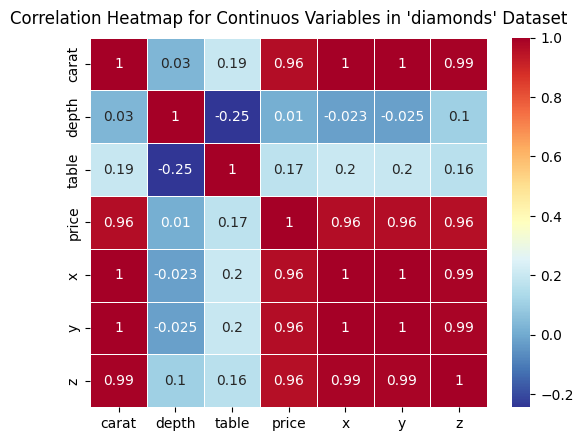

In [ ]:
sns.heatmap(data.corr(method='spearman', numeric_only=True), annot=True, cmap='RdYlBu_r', linewidths=0.5)
plt.title("Correlation Heatmap for Continuos Variables in 'diamonds' Dataset", pad=10)
plt.show()

The correlations among the continuous variables in the dataset ('carat', 'depth', 'table', 'price', 'x', 'y' and 'z') is presented as heatmap. No correlations are detected for the variables 'depth' and 'table' with any other variable. For the rest, strong positive correlations are present:
- 'carat' correlated with 'price', 'x', 'y' and 'z'.
- 'price' also correlated with 'x', 'y' and 'z'.
- 'x' also correlated with 'y' and 'z'.
- 'y' also correlated with 'z'.

## 2. Represent this correlations with a pair plot. Use the density plot for the diagonal. Just checking the scatterplots, do you think there's any outliers.

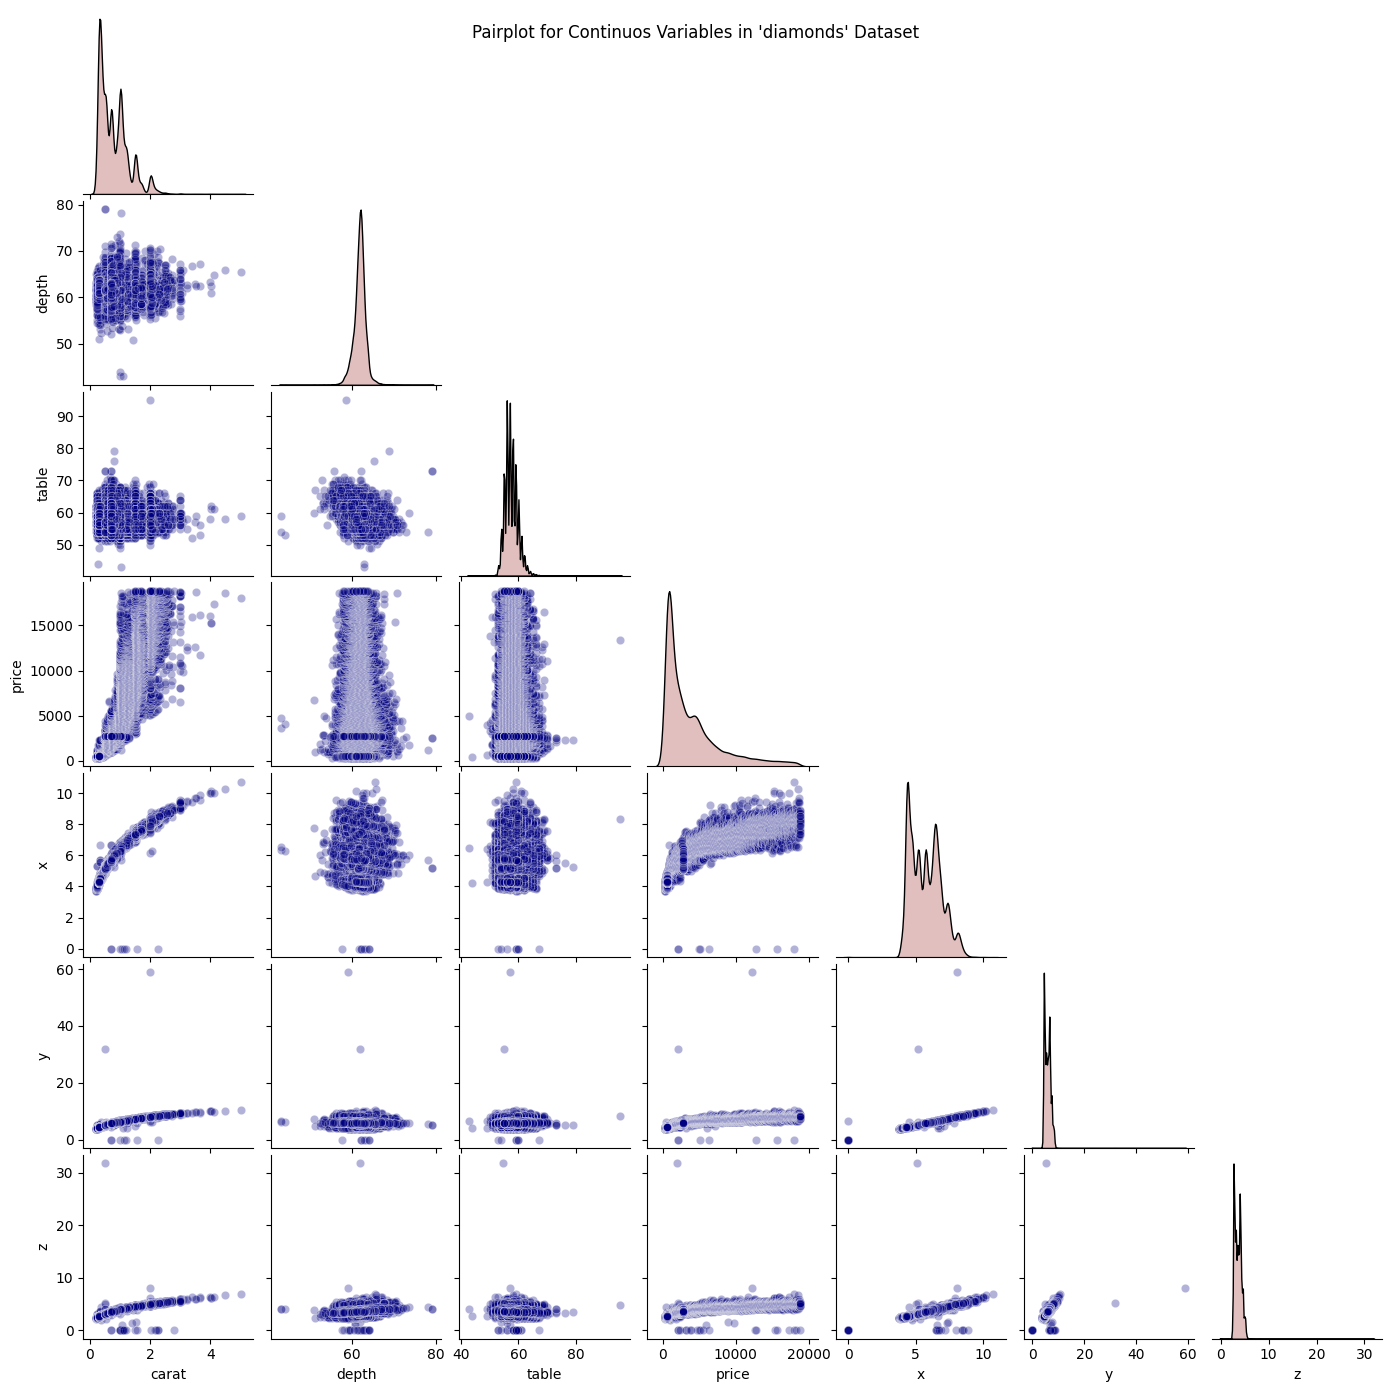

In [ ]:
g = sns.pairplot(data, diag_kind='kde', height=2, corner=True, plot_kws={'color':'navy','alpha':0.3}, diag_kws={'color':'darkred','edgecolor':'black'}, grid_kws={'layout_pad':0})
g.fig.suptitle("Pairplot for Continuos Variables in 'diamonds' Dataset")
plt.show()

The figure shows the correlations previously explored for the continuous variables of the datset represented by scatterplots (using sns.pairplot), and in its diagonal the distribution of each one of them by kde plot. It can be observed that in the case of the strong positive correlations detected (exercise 1) the relationships are not linear. According to the distribution of the observations in the scatterplots, the presence of outliers in the form of extreme maximum and/or minimum values (separated from the cloud of points) is detected in all of them, noteworthy the 0 values in the 'x', 'y' and 'z' variables.
Excluding 'price', the rest of the continuous variables are directly related to diamond dimensions ('carat': weight of the diamond, 'table': width of top of diamond relative to widest point, 'depth': total depth percentage, 'x': length in mm, 'y': width in mm and 'z': depth in mm). Considering it, the presence of these outliers (excluding 0 dimensions), especially maximum values, is in the range of 'valid' or 'normal' values since diamonds of large dimensions are less frequent in nature.

## 3. How does relate the categorical variables to the price of a diamond? Use boxplots

**Categorical Variables - Brief Explanation**

*Cut* - > How the manufacturer shapes a rough diamond. A better cut creates a more symmetrical and luminous diamond. Types of cut from worst to best: Fair, Good, Very Good, Premium and Ideal.

*Color* -> A pure/structurally perfect diamond is transparent. For diamonds in the normal color range ('white' diamonds, those in the dataset), a grading scale is used, ranging from D, which is totally colorless (most valuable), to Z, which is pale yellow or brown.

*Clarity* -> Diamonds often contain imperfections,  the fewer the imperfections in a diamond the better its the clarity. Clarity contains 8 ordered levels:  from I1 (the worst) to IF (the best).

The categories in these variables will be represented in ascending order according to what is considered the most valuable/best.

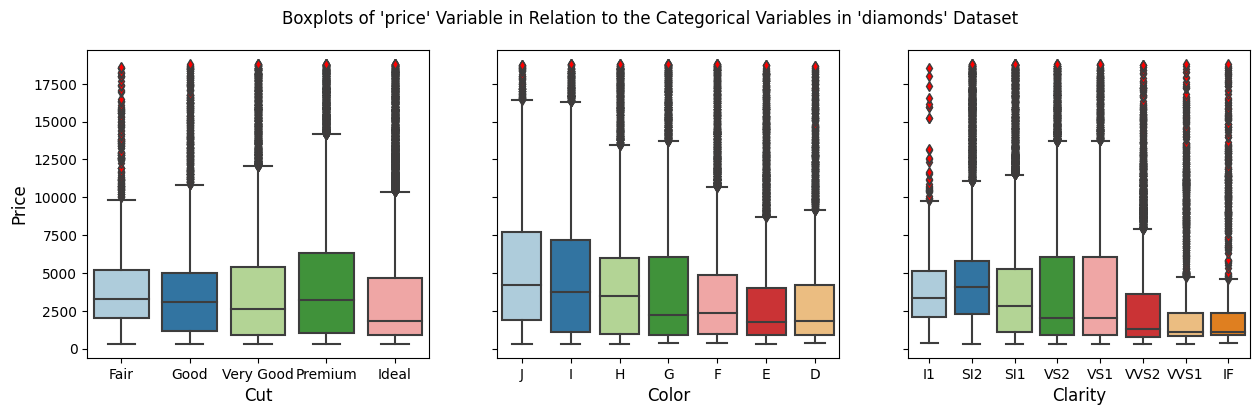

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15,4))

sns.boxplot(data, x='cut', y='price', ax=axes[0], flierprops={'markerfacecolor':'red'}, palette='Paired', order=['Fair','Good','Very Good','Premium','Ideal'])
sns.boxplot(data, x='color', y='price', ax=axes[1], flierprops={'markerfacecolor':'red'}, palette='Paired', order=['J','I','H','G','F','E','D'])
sns.boxplot(data, x='clarity', y='price', ax=axes[2], flierprops={'markerfacecolor':'red'}, palette='Paired', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])

axes[0].set_xlabel('Cut', fontsize='large')
axes[0].set_ylabel('Price', fontsize='large')
axes[1].set_xlabel('Color', fontsize='large')
axes[1].set_ylabel('')
axes[2].set_xlabel('Clarity', fontsize='large')
axes[2].set_ylabel('')

axes[0].set_title('')
fig.suptitle("Boxplots of 'price' Variable in Relation to the Categorical Variables in 'diamonds' Dataset")
plt.show()

The distribution of 'price' variable for each of the groups of categorical variables contained in the dataset is presented using boxplots ('price' vs. 'cut' by categories, 'price' vs. 'color' by categories, and 'price' vs. 'clarity' by categories). In each of these plots it can be observed that there are probably differences in 'price' when considering all the categories of each variable ('cut', 'color' and 'clarity') respectively (Kruskal test), taking into account the medians of the groups. However, the differences between the categories of these variables with respect to 'price' are not particularly clear. Of particular note are the differences in 'price' at the visual level in the 'clarity' variable between its categories I1/SI2 vs. WS1/IF. Also noteworthy is the large presence of outliers in all groups.

## 4. Do you see any relation to the color and clarity of diamonds? And color and cut? And clarity and cut? (Use countplots to see if any of the vars are really different in each group)

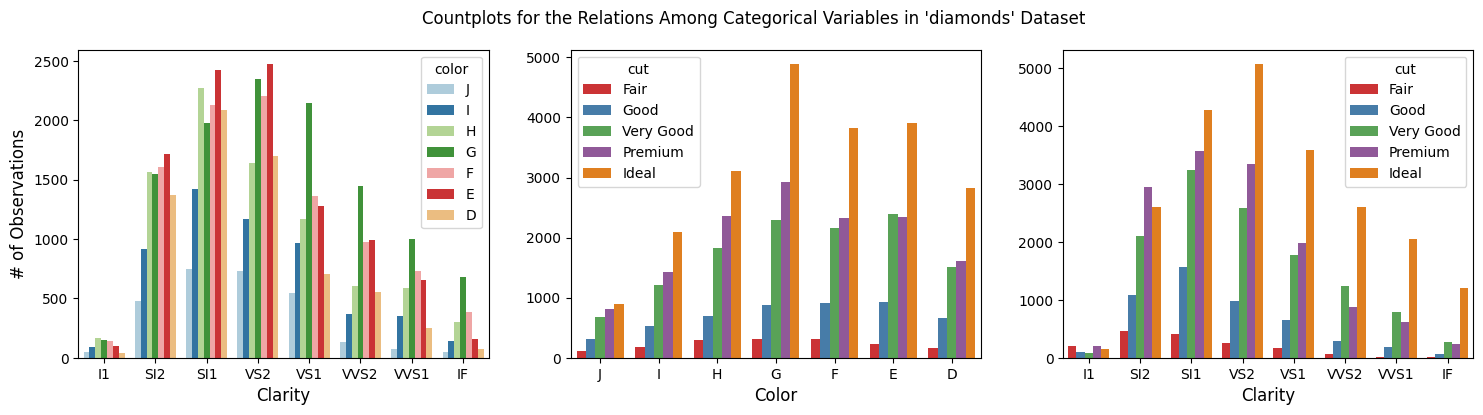

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
sns.countplot(data, x='clarity', hue='color', ax=axes[0], palette='Paired', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], hue_order=['J','I','H','G','F','E','D'])
sns.countplot(data, x='color', hue='cut', ax=axes[1], palette='Set1', order=['J','I','H','G','F','E','D'], hue_order=['Fair','Good','Very Good','Premium','Ideal'])
sns.countplot(data, x='clarity', hue='cut', ax=axes[2], palette='Set1', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], hue_order=['Fair','Good','Very Good','Premium','Ideal'])

axes[0].set_xlabel('Clarity', fontsize='large')
axes[0].set_ylabel('# of Observations', fontsize='large')
axes[1].set_xlabel('Color', fontsize='large')
axes[1].set_ylabel('')
axes[2].set_xlabel('Clarity', fontsize='large')
axes[2].set_ylabel('')

fig.suptitle("Countplots for the Relations Among Categorical Variables in 'diamonds' Dataset")
plt.show()

In overall terms, there are no detectable differences or associations between the categories of the variables contrasted: ‘color’ vs. ‘clarity’ (on x-axis for better visualization), ‘color’ vs. ‘cut’, and ‘clarity’ vs. ‘cut’. Noteworthy (as a generality in the total sample), the ideal cut is the most frequently found, probably related to the fact that it is the most valued and is modifiable by the manufacturer.

## 5. Do you see any relations between the carat of a diamond, it's color and the price? (use a scatterplot) Do you think one of the color is more valueable when the carat is bigger?

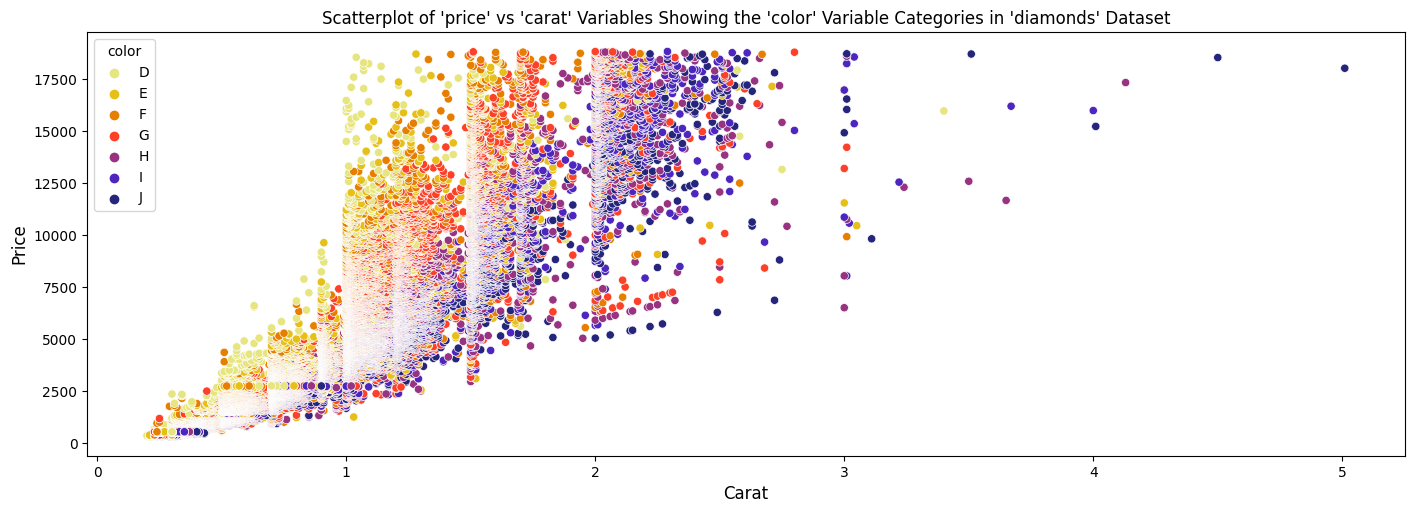

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17,5.5))
sns.scatterplot(data, x='carat', y='price', hue='color', palette='CMRmap_r')
ax.set_xlabel('Carat', fontsize='large')
ax.set_ylabel('Price', fontsize='large')
plt.title("Scatterplot of 'price' vs 'carat' Variables Showing the 'color' Variable Categories in 'diamonds' Dataset")
plt.show()

From the scatterplot, there is a clear positive relationship between ‘price’ and ‘carat’, with the price of diamonds increasing with increasing carat. For diamonds of similar carat, the more transparent diamonds (color D to G) have a higher price (random subsample, ‘carat’ <3, plotted below for better visualization). Diamonds with large carats are less frequent (32 diamonds in the dataset with ‘carat’ >=3), so there is not a wide representation of colors and their price seems to be more related to ‘carat’ regardless of ‘color’. In this particular dataset, the most valuable colors in large carat diamonds were from H to J, but they are also the most frequent in this type of diamonds.

# of diamonds by carats: 0 to <1-> 36438, 1 to <2-> 15613, 2 to <3-> 1857, and >=3-> 32



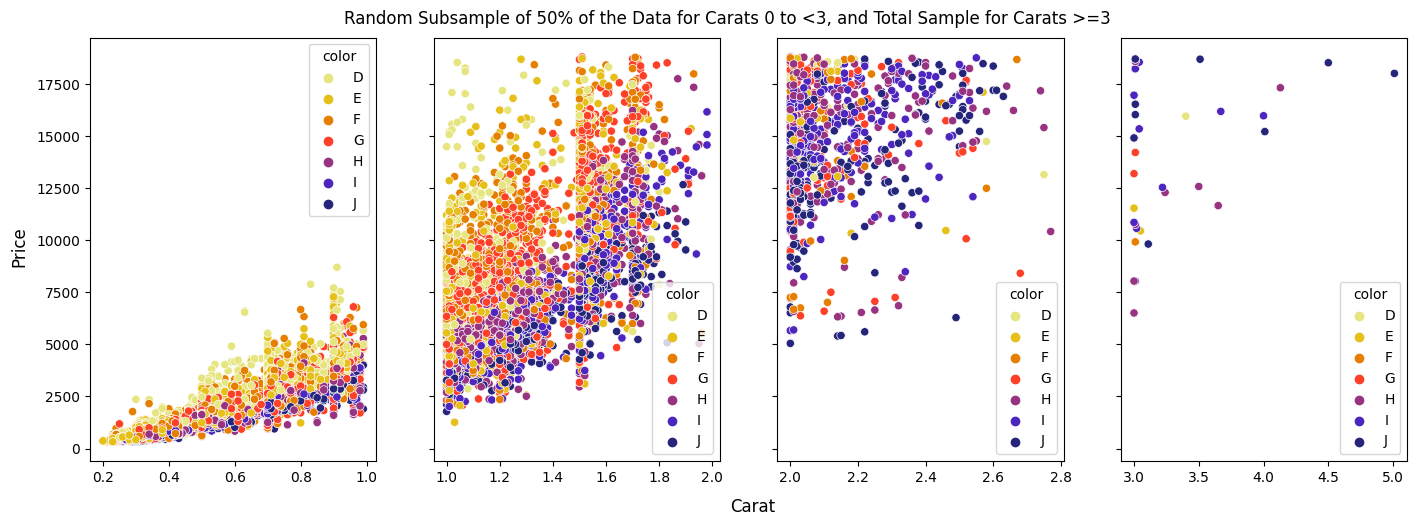

In [ ]:
print(f'# of diamonds by carats: 0 to <1-> {data[data.carat<=1].carat.count()}, 1 to <2-> {data[(data.carat>1)&(data.carat<=2)].carat.count()}, 2 to <3-> {data[(data.carat>2)&(data.carat<=3)].carat.count()}, and >=3-> {data[data.carat>3].carat.count()}')
print()
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(17,5.5))
sns.scatterplot(data[data.carat<1].sample(frac=0.5), x='carat', y='price', hue='color', ax=axes[0], palette='CMRmap_r')
sns.scatterplot(data[(data.carat>=1)&(data.carat<2)].sample(frac=0.5), x='carat', y='price', hue='color', ax=axes[1], palette='CMRmap_r')
sns.scatterplot(data[(data.carat>=2)&(data.carat<3)].sample(frac=0.5), x='carat', y='price', hue='color', ax=axes[2], palette='CMRmap_r')
sns.scatterplot(data[data.carat>=3], x='carat', y='price', hue='color', ax=axes[3], palette='CMRmap_r')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
fig.supylabel('Price', x=0.078)
fig.supxlabel('Carat', x=0.515)
fig.suptitle("Random Subsample of 50% of the Data for Carats 0 to <3, and Total Sample for Carats >=3", y=0.93)
plt.show()